<a href="https://colab.research.google.com/github/Paloma-Moya-Tudela/AA_PRACTICA1_GRUPO_2/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

Paloma Moya Tudela

María García Rodríguez

Elena Peral Pastor

Sofía Peña González



# RESUMEN

# ÍNDICE



*   Introducción
*   Resolución
*   Conclusiones
*   Reflexiones
*   Referencias Bibliográficas







# INTRODUCCIÓN

Las Redes de Neuronas Artificiales son una herramienta muy útil, y cada vez más utilizada, para resolver problemas cotidianos. Sin embargo, están siendo también de gran ayuda para hallar las respuestas a cuestiones increíblemente complejas.
La fuerte componente biológica sobre la que se sustenta llama considerablemente la atención, y es esta característica lo que las hace únicas.
Sin darnos cuenta, estas redes están siendo implementadas en multitud de campos. Y es que las empresas son capaces de lograr llamativos beneficios gracias a la eficacia de este método; empresas como Zalando, cuyas ventas se van a trabajar a lo largo de este proyecto.

# RESOLUCIÓN

El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

**PROBLEMA:**

* Reconocer y clasificar imágenes - en escala de grises - de ropa (28 x 28 píxeles) en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
* Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST: artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.


Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código. Sin embargo, antes de comenzar importemnos qyuras y el resto de librerías necesarias para la red neuronal, asegurando que es la versión 2.0.0 (o superior) de TensorFlow.

**DISEÑO, ENTRENAMIENTO Y TEST DE UN SISTEMA DE REDES DE NEURONAS ARTIFICIALES**

In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


Cargamos el conjunto de datos  MNIST en Keras


In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Al cargar el set de datos retorna cuatro arreglos en NumPy:
- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1) 

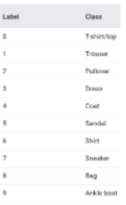

Como los `Class names` no están incluidos los podremos a mano en el siguiente código: 

In [ ]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Una vez tenemos los datos preparados se puede proceder a echarle un vistazo a los **datos de entrenamiento**
## Pre-porceso del set de datos

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Esto nos indica que el data set de los **datos de entrenamiento** contiene 60K elementos de 28x28, tal cual como indica el enunciado.
A continución, veamos la imágenes de otra forma, por ejemplo veamos la matriz de la imágen número 0

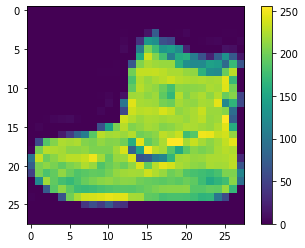

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Nos encontramos un porblema, se observa que los valores van de 0 a 250 y para aplicarlos a la red neuronal deben ser valores entre 0 y 1 para que los datos de entrenamiento y de test sean porcesados de la misma manera. Arreglemolos de la siguiente forma:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Volvamos a mostrar la imagen, los valores serán entre 0 y 1:

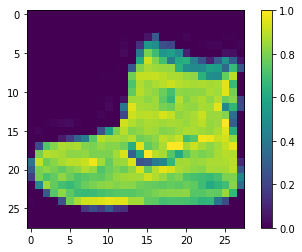

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

También podemos visalizarla en forma de matriz, eavmos el ejemplo 2000, que debe ser similar a la imagen de un sneaker:



In [ ]:
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Por último, antes de comenzar con la red neuronal incluimos una representación de los 10 primeros elemento con sus correspondientes etiquietas, de esta forma nos aseguramos de que el data set es correcto.

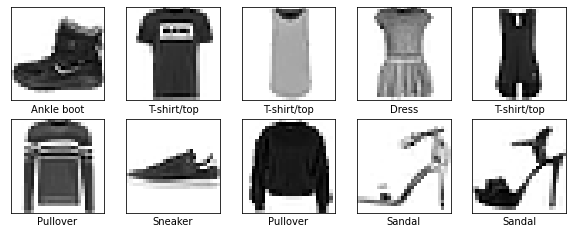

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labels[i]])
plt.show()

## Configuración de los casos

***1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.***

Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.
Captura de Pantalla 2022-11-04 a las 12.21.01.png

En este apartado, se dará a la RNA los datos de entrenamiento train_images y train_labels. Esta aprenderá a asociar imágenes y etiquetas, por lo que pediremos a la RNA que haga predicciones para test_images y comprobaremos si estas predicciones coinciden con las etiquetas de test_labels.

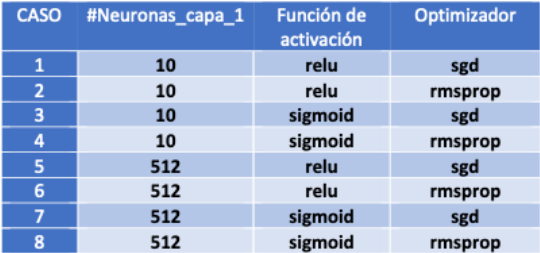

**Caso 1**

In [ ]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu')
])
model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 4.6540 - accuracy: 0.1032
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.8735 - accuracy: 0.1572
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.4950 - accuracy: 0.3244
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3027
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1000


**Caso 2**

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu')
])
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1002
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000


**Caso 3**

In [ ]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])
model3.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 1.1506 - accuracy: 0.6482
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.7809 - accuracy: 0.7507
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.7774
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6485 - accuracy: 0.7920
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6176 - accuracy: 0.8005


**Caso 4**

In [ ]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])
model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6843 - accuracy: 0.7714
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4959 - accuracy: 0.8316
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4622 - accuracy: 0.8431
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.8496
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8522


**Caso 5**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu')
])
model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 3.9201 - accuracy: 0.1268
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 2.3727 - accuracy: 0.1023
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 2.2997 - accuracy: 0.1023
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 2.3265 - accuracy: 0.1023
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 2.2858 - accuracy: 0.1023


**Caso 6**

In [ ]:
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu')
])
model6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 7.6260 - accuracy: 0.1273
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 6.4080 - accuracy: 0.1264
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 6.1944 - accuracy: 0.1579
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 6.2829 - accuracy: 0.1383
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 6.1864 - accuracy: 0.1521


**Caso 7**

In [ ]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid')
])
model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 2025.1132 - accuracy: 0.7062
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1216.2836 - accuracy: 0.7672
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 1170.0425 - accuracy: 0.7735
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 1122.5134 - accuracy: 0.7799
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 1065.5366 - accuracy: 0.7865


**Caso 8**

In [ ]:
model8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid')
])
model8.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 19.8786 - accuracy: 0.7061
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 14.2337 - accuracy: 0.7667
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 13.3988 - accuracy: 0.7786
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 12.9009 - accuracy: 0.7821
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 12.6239 - accuracy: 0.7850


## Salidas

***2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos.***

In [ ]:
model1.summary() 

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_80 (Flatten)        (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary() 

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_81 (Flatten)        (None, 784)               0         
                                                                 
 dense_85 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.summary() 

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_82 (Flatten)        (None, 784)               0         
                                                                 
 dense_86 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.summary() 

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_83 (Flatten)        (None, 784)               0         
                                                                 
 dense_87 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.summary() 

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_84 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.summary() 

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_85 (Flatten)        (None, 784)               0         
                                                                 
 dense_89 (Dense)            (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.summary() 

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_86 (Flatten)        (None, 784)               0         
                                                                 
 dense_90 (Dense)            (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.summary() 

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_87 (Flatten)        (None, 784)               0         
                                                                 
 dense_91 (Dense)            (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


##25 épocas

***3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25).***

**Caso 2**

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model2_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu')
])
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 11/25
469/469 [========

**Caso 7**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
model7_7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid')
])
model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model7.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 966.9142 - accuracy: 0.8037
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 963.7927 - accuracy: 0.8055
Epoch 3/25
469/469 [==============================] - 5s 10ms/step - loss: 967.9745 - accuracy: 0.8014
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 940.9379 - accuracy: 0.8034
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 949.2081 - accuracy: 0.8028
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 921.8209 - accuracy: 0.8044
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 948.9077 - accuracy: 0.8067
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 938.4652 - accuracy: 0.8071
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 931.1235 - accuracy: 0.8041
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 948.0

## Comparación de rendimiento

***4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba.***

In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_labels = to_categorical(test_labels)
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)
test_loss6, test_acc6 = model6.evaluate(test_images, test_labels)
test_loss7, test_acc7 = model7.evaluate(test_images, test_labels)
test_loss8, test_acc8 = model8.evaluate(test_images, test_labels)

#print('test_loss8:', test_loss ,'test_acc8:', test_acc)  con esto se muestran mas decimales a rabazo

313/313 [==============================] - 1s 3ms/step - loss: 14.1577 - accuracy: 0.7590


## Predicciones

***5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5]).***

Primero printemaos testtimages5 para visualizacion inicial, son pantalones!!!! De al categoria 1, 

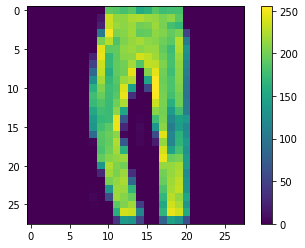

In [ ]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
prediction1 = model1.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
prediction1[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

Encoontraoms le numero mas alto en la segunda posicion, que es la categoria 8, no es correcto

In [ ]:
np.argmax(prediction1[5])

0

**caso2**

In [ ]:
prediction2 = model2.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction2[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
np.argmax(prediction2[5])

0

**caso3**

In [ ]:
prediction3 = model3.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
prediction3[5]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(prediction3[5])

0

**caso4**

In [ ]:
prediction4 = model4.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction4[5]

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(prediction4[5])

1

**caso5**

In [ ]:
prediction5 = model5.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction5[5]

array([7580.88, 2938.59, 3809.83,  570.3 ,  295.14, 2107.28, 1757.79,  920.51,  754.03,  887.97,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
      

In [ ]:
np.argmax(prediction5[5])

0

**caso6**

In [ ]:
prediction6 = model6.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction6[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
np.argmax(prediction6[5])

0

**caso7**

In [ ]:
prediction7 = model7.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction7[5]

array([1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.94, 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.44, 1.  ,
       0.16, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ,
       0.  , 0.  , 0.  , 0.02, 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 0.12, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.01, 1.  , 0.  , 0.  , 0.94, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.83, 1.  , 0.  , 0.  , 0.  , 1. 

In [ ]:
np.argmax(prediction7[5])

0

**caso8**

In [ ]:
prediction8 = model8.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction8[5]

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.9 , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.12,
       1.  , 0.  , 0.  , 0.75, 1.  , 0.  , 0.  , 0.99, 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0. 

In [ ]:
np.argmax(prediction8[5])

0

## 6 HACER PINTURA


***6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos.***

- azul = valores menores del las otras prediciones

- rojo = el interpretado
- negro= el rial no fake

In [ ]:


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


**Caso 1**

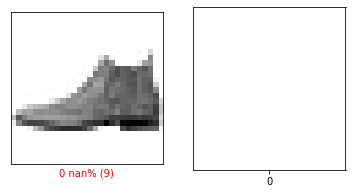

<Figure size 432x288 with 0 Axes>

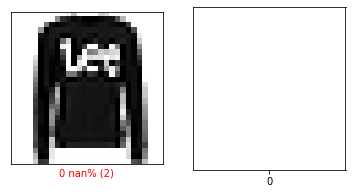

<Figure size 432x288 with 0 Axes>

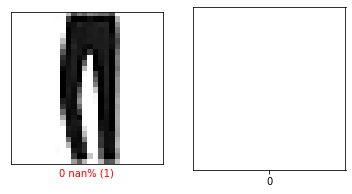

<Figure size 432x288 with 0 Axes>

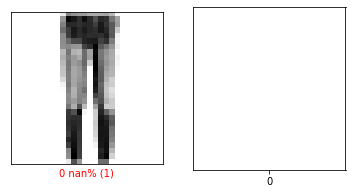

<Figure size 432x288 with 0 Axes>

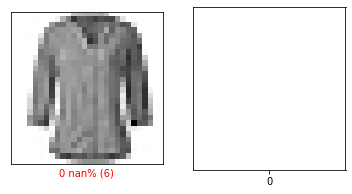

<Figure size 432x288 with 0 Axes>

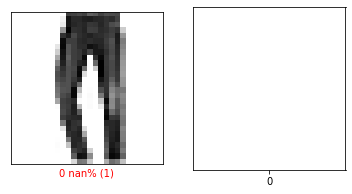

<Figure size 432x288 with 0 Axes>

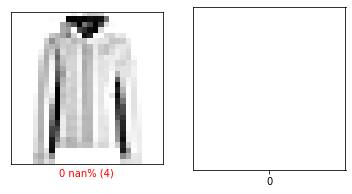

<Figure size 432x288 with 0 Axes>

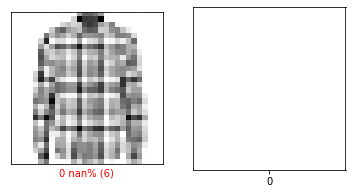

<Figure size 432x288 with 0 Axes>

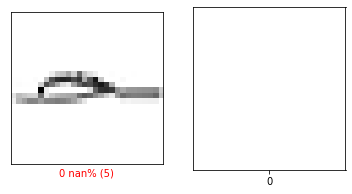

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction1[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction1[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 2**

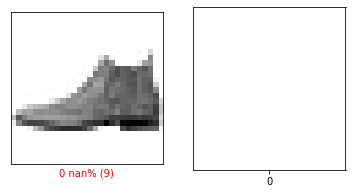

<Figure size 432x288 with 0 Axes>

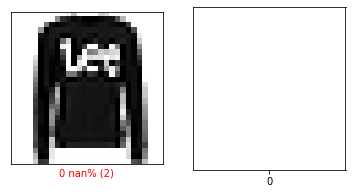

<Figure size 432x288 with 0 Axes>

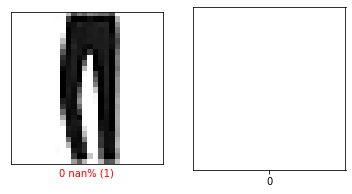

<Figure size 432x288 with 0 Axes>

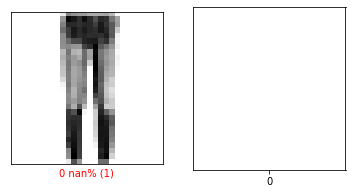

<Figure size 432x288 with 0 Axes>

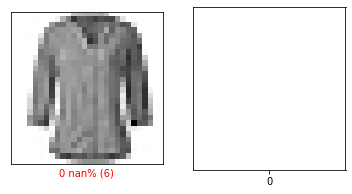

<Figure size 432x288 with 0 Axes>

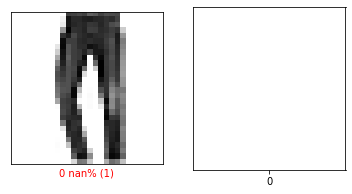

<Figure size 432x288 with 0 Axes>

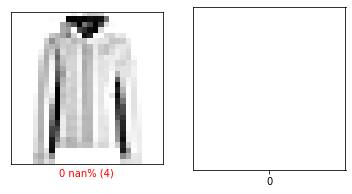

<Figure size 432x288 with 0 Axes>

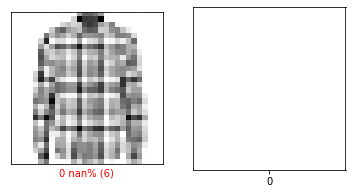

<Figure size 432x288 with 0 Axes>

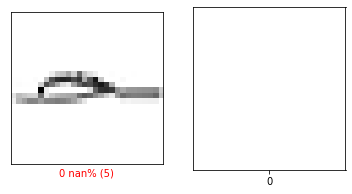

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction2[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction2[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 3**

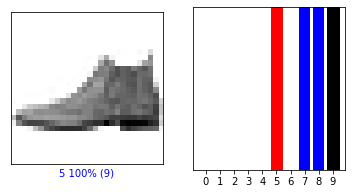

<Figure size 432x288 with 0 Axes>

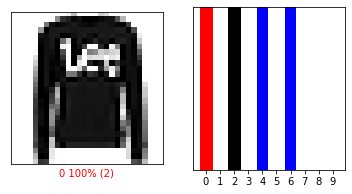

<Figure size 432x288 with 0 Axes>

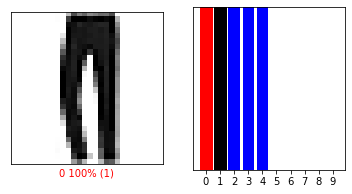

<Figure size 432x288 with 0 Axes>

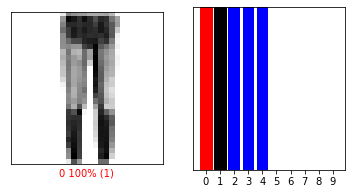

<Figure size 432x288 with 0 Axes>

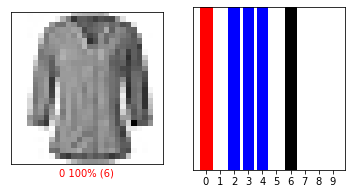

<Figure size 432x288 with 0 Axes>

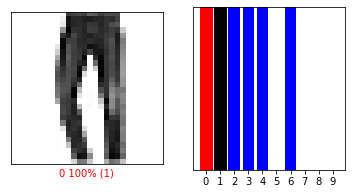

<Figure size 432x288 with 0 Axes>

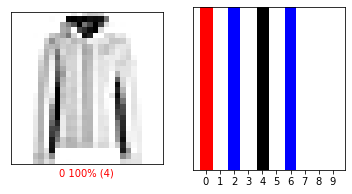

<Figure size 432x288 with 0 Axes>

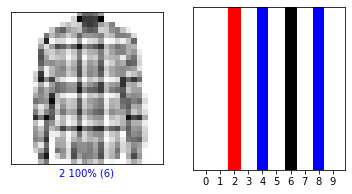

<Figure size 432x288 with 0 Axes>

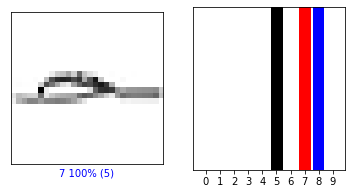

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction3[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction3[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 4**

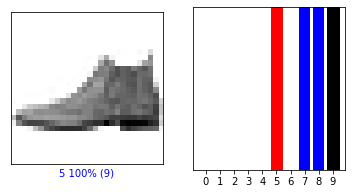

<Figure size 432x288 with 0 Axes>

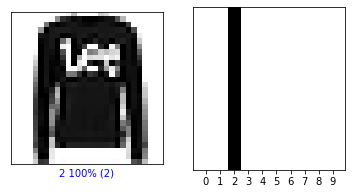

<Figure size 432x288 with 0 Axes>

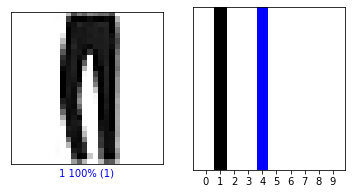

<Figure size 432x288 with 0 Axes>

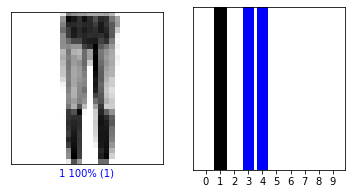

<Figure size 432x288 with 0 Axes>

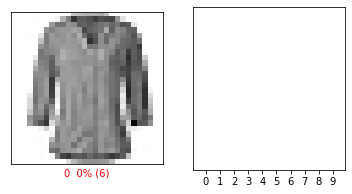

<Figure size 432x288 with 0 Axes>

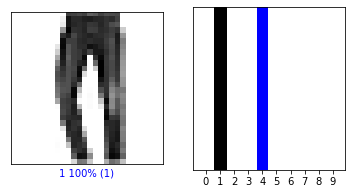

<Figure size 432x288 with 0 Axes>

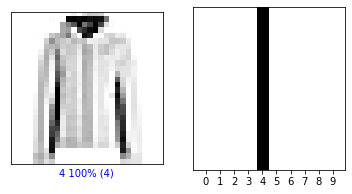

<Figure size 432x288 with 0 Axes>

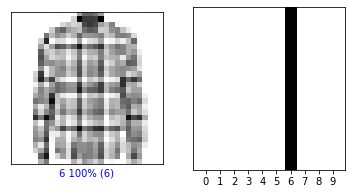

<Figure size 432x288 with 0 Axes>

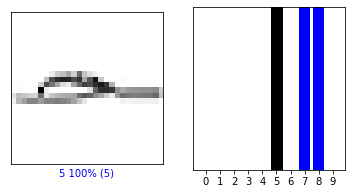

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction4[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction4[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 5**

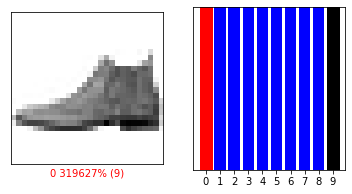

<Figure size 432x288 with 0 Axes>

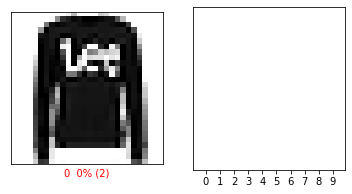

<Figure size 432x288 with 0 Axes>

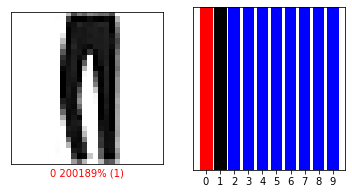

<Figure size 432x288 with 0 Axes>

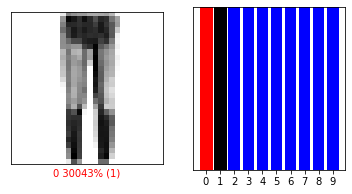

<Figure size 432x288 with 0 Axes>

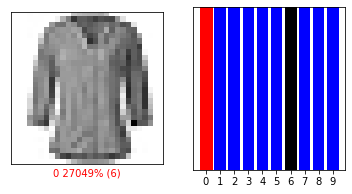

<Figure size 432x288 with 0 Axes>

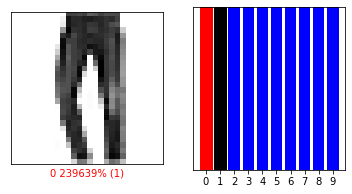

<Figure size 432x288 with 0 Axes>

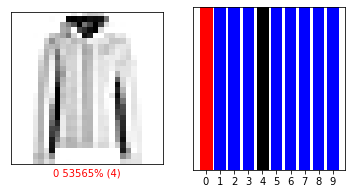

<Figure size 432x288 with 0 Axes>

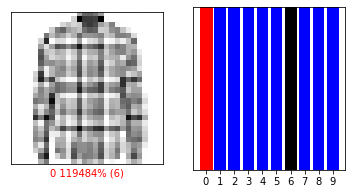

<Figure size 432x288 with 0 Axes>

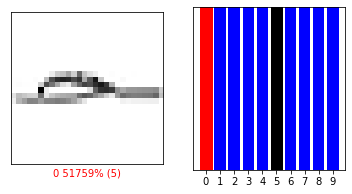

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction5 = prediction5.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction5[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction5[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 6**

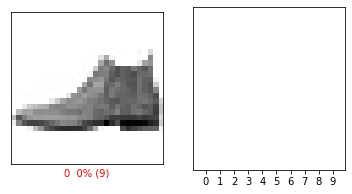

<Figure size 432x288 with 0 Axes>

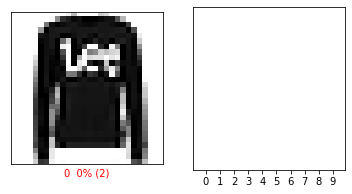

<Figure size 432x288 with 0 Axes>

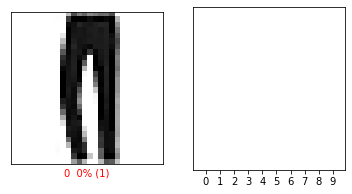

<Figure size 432x288 with 0 Axes>

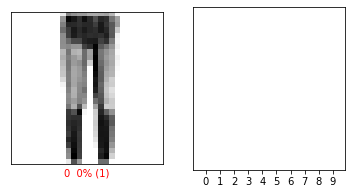

<Figure size 432x288 with 0 Axes>

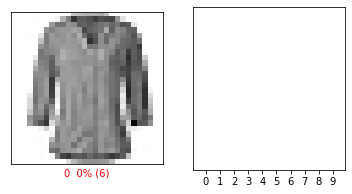

<Figure size 432x288 with 0 Axes>

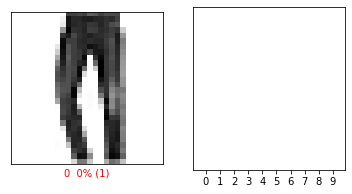

<Figure size 432x288 with 0 Axes>

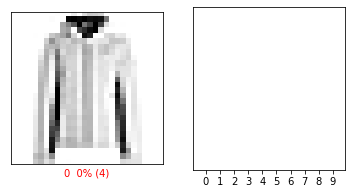

<Figure size 432x288 with 0 Axes>

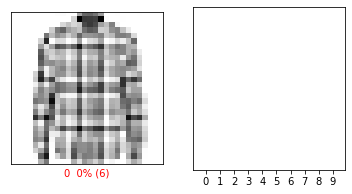

<Figure size 432x288 with 0 Axes>

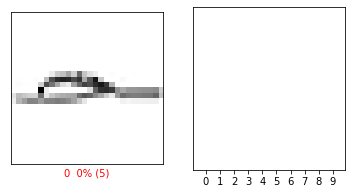

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction6 = prediction6.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction6[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction6[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 7**

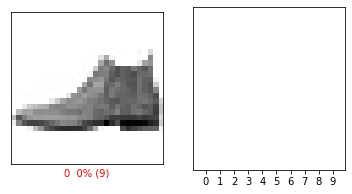

<Figure size 432x288 with 0 Axes>

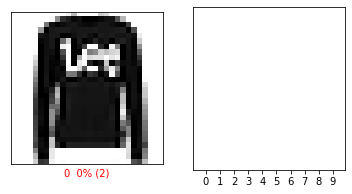

<Figure size 432x288 with 0 Axes>

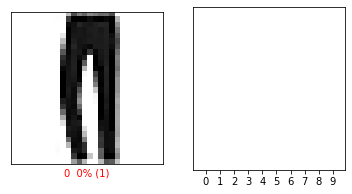

<Figure size 432x288 with 0 Axes>

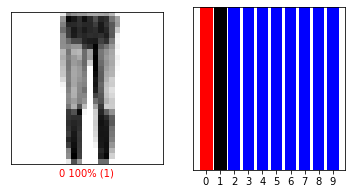

<Figure size 432x288 with 0 Axes>

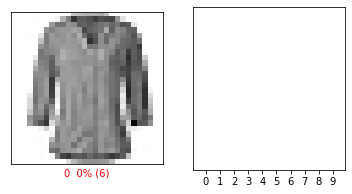

<Figure size 432x288 with 0 Axes>

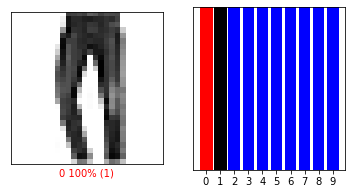

<Figure size 432x288 with 0 Axes>

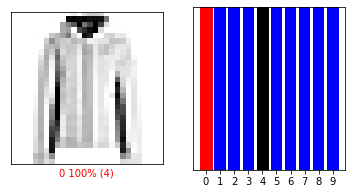

<Figure size 432x288 with 0 Axes>

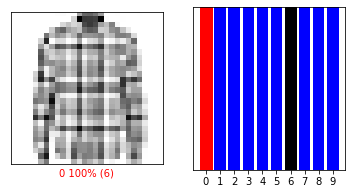

<Figure size 432x288 with 0 Axes>

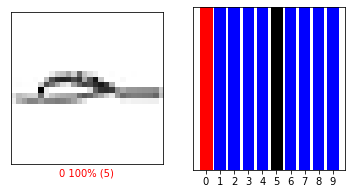

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction7 = prediction7.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction7[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction7[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 5**

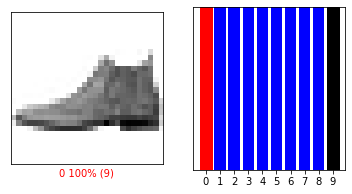

<Figure size 432x288 with 0 Axes>

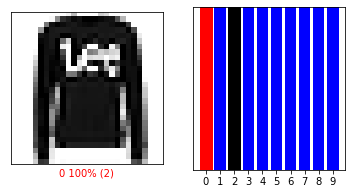

<Figure size 432x288 with 0 Axes>

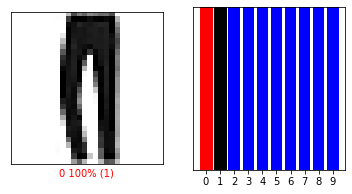

<Figure size 432x288 with 0 Axes>

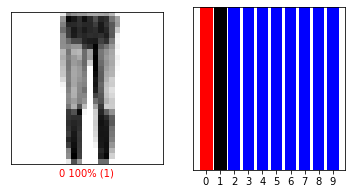

<Figure size 432x288 with 0 Axes>

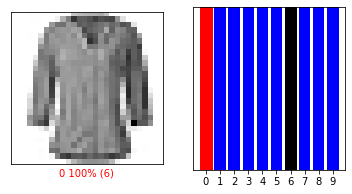

<Figure size 432x288 with 0 Axes>

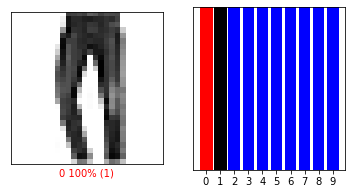

<Figure size 432x288 with 0 Axes>

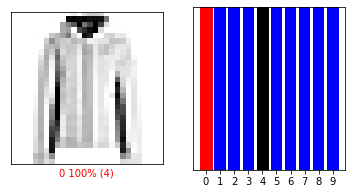

<Figure size 432x288 with 0 Axes>

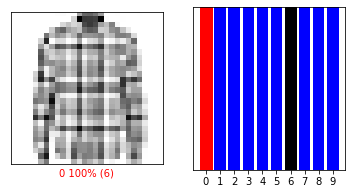

<Figure size 432x288 with 0 Axes>

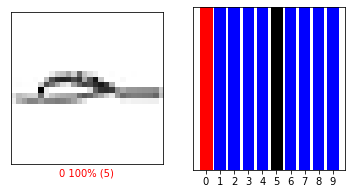

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction8 = prediction8.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction8[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction8[i],  test_labels)
  plt.show()
  plt.clf()

##7 Adam y ‘sparse_categorical_crossentropy’. en caso 3

***7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.***

**Caso 3**

In [ ]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 19.0361 - accuracy: 0.7037
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 9.6779 - accuracy: 0.7789
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 7.7730 - accuracy: 0.7949
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 6.9442 - accuracy: 0.7973
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 6.7876 - accuracy: 0.7988


# Conclusiones

# Reflexiones

## 1.   Cómo hemos afrontado la solución de la práctica





## 2.   Cómo se ha dividido el trabajo

## 3.   Cómo se ha gestionado el equipo para trabajar

# Referencias bibliográficas

- Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula